# Visualize Twitch Data with Matplotlib

Now that you’ve conducted some analysis with SQL, you will be taking your findings from the SQL queries and visualize them using Python and Matplotlib, in the forms of:
- Bar Graph: Featured Games
- Pie Chart: Stream Viewers’ Locations
- Line Graph: Time Series Analysis

The Twitch Science Team provided this practice dataset. You can download the .csv files (800,000 rows) from GitHub.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Bar Graph: Featured Games 

Twitch’s home page has a Featured Games section where it lists the “Games people are watching now”.

In [2]:
games = ["LoL", "Dota 2", "CS:GO", "DayZ", "HOS", "Isaac", "Shows", "Hearth", "WoT", "Agar.io"]

viewers =  [1070, 472, 302, 239, 210, 171, 170, 90, 86, 71]

<ipython-input-23-2f1197e68e5c>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


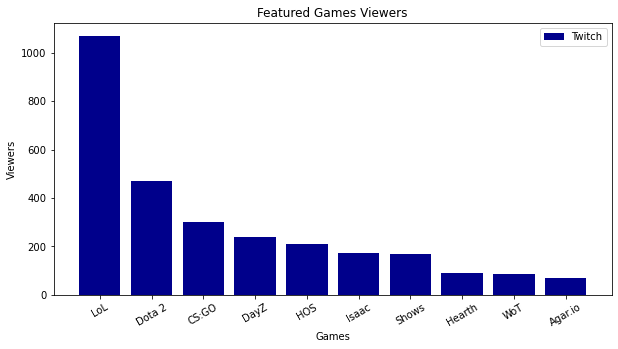

<Figure size 432x288 with 0 Axes>

In [23]:
# Bar graph
plt.figure(figsize=(10, 5))

plt.bar(range(len(games)), viewers, color='darkblue')

ax = plt.subplot()
ax.set_xticks(range(len(games)))
ax.set_xticklabels(games, rotation=30)

plt.title('Featured Games Viewers')
plt.xlabel('Games')
plt.ylabel('Viewers')
plt.legend(['Twitch'])

plt.show()
plt.clf()

### Pie Chart: League of Legends Viewers' Whereabouts 

There are 1070 League of Legends viewers from this dataset. Where are they coming from?

In [18]:
labels = ["US", "DE", "CA", "N/A", "GB", "TR", "BR", "DK", "PL", "BE", "NL", "Others"]

countries = [447, 66, 64, 49, 45, 28, 25, 20, 19, 17, 17, 279]

In [19]:
colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'khaki', 
          'gold', 'violet', 'yellowgreen']

In [26]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

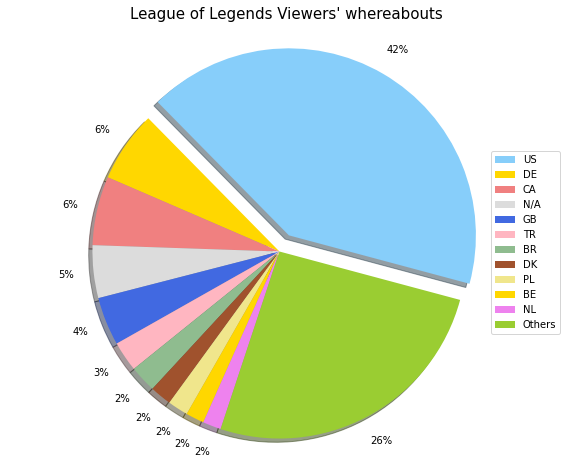

<Figure size 432x288 with 0 Axes>

In [39]:
# Pie chart
plt.figure(figsize=(10,8))

plt.pie(countries, explode=explode, colors=colors, shadow=True, startangle=345, autopct='%1.0f%%', pctdistance=1.15)
plt.axis('equal')

plt.title("League of Legends Viewers' whereabouts", fontsize=15)
plt.legend(labels, loc='right')

plt.show()
plt.clf()

### Line Graph: Time Series Analysis

We were able to find the number of US viewers at different hours of the day on January 1st, 2015:

In [40]:
hour = range(24)

viewers_hour = [30, 17, 34, 29, 19, 14, 3, 2, 4, 9, 5, 48, 62, 58, 40, 51, 69, 55, 76, 81, 102, 120, 71, 63]

<ipython-input-45-2cd2c756abe1>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


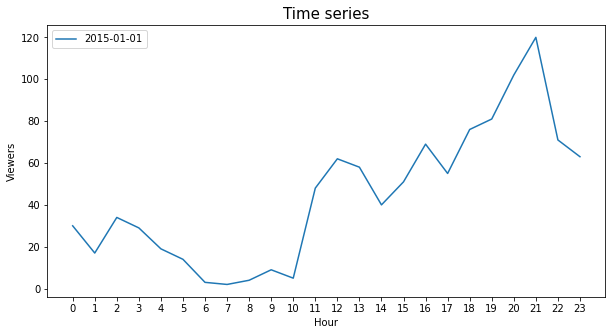

In [45]:
# plot graph
plt.figure(figsize=(10,5))

plt.plot(hour, viewers_hour)

ax = plt.subplot()
ax.set_xticks(hour)
ax.set_yticks([0, 20, 40, 60, 80, 100, 120])

plt.title('Time series', fontsize=15)
plt.xlabel('Hour')
plt.ylabel('Viewers')
plt.legend(['2015-01-01'])
plt.show()

There is some uncertainty in these numbers because some people leave their browsers open. Let’s account for a 15% error in the viewers_hour data.
- First, create a list containing the upper bound of the viewers_hour and call it y_upper.
- Then, create a list containing the lower bound of the viewers_hour and call it y_lower.

Lastly, use plt.fill_between() to shade the error, with an alpha of 0.2.

<ipython-input-46-42db82a4fca3>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


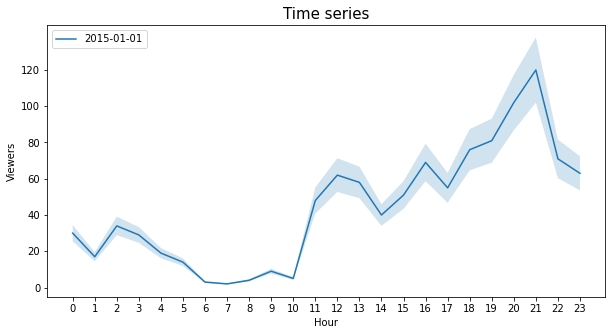

In [46]:
# plot graph
plt.figure(figsize=(10,5))

plt.plot(hour, viewers_hour)

ax = plt.subplot()
ax.set_xticks(hour)
ax.set_yticks([0, 20, 40, 60, 80, 100, 120])

plt.title('Time series', fontsize=15)
plt.xlabel('Hour')
plt.ylabel('Viewers')
plt.legend(['2015-01-01'], loc=2)

# Add 
y_upper = [i + (i*0.15) for i in viewers_hour]
y_lower = [i - (i*0.15) for i in viewers_hour]
plt.fill_between(hour, y_lower, y_upper, alpha=0.2)

plt.show()